In [1]:
import numpy as np
np.random.seed(10)
import matplotlib.pyplot as plt

In [2]:
def load_partition_data():
    # Load data
    x = np.random.uniform(low=-4.0,high=4.0,size=(200,1))
    y = x**3 + np.random.normal(0,9)
    
    total_data = np.concatenate((x,y),axis=-1)
    
    train_data = total_data[:40]
    valid_data = total_data[40:60]
    test_data = total_data[60:]

    data_tuple = (train_data, valid_data, test_data)

    return data_tuple

In [3]:
data_tuple = load_partition_data()

In [4]:
train_mode = False

In [5]:
from variational import variational_model
variational_model = variational_model(data_tuple,lrate=0.0001,num_epochs=4000)
if train_mode:
    variational_model.train_model()
variational_model.model_inference()
# Variational Bayes
variational_predictions = np.load('Variational_predictions.npy')
variational_mean = np.mean(variational_predictions,axis=0)
variational_std = np.std(variational_predictions,axis=0)

In [6]:
train_mode = False

In [7]:
from baseline import baseline_model
baseline_model = baseline_model(data_tuple,lrate=0.01,num_epochs=4000)
if train_mode:
    baseline_model.train_model()
baseline_model.model_inference()
# Load baseline
baseline = np.load('Baseline_prediction.npy')

In [8]:
from dropout import dropout_model
dropout_model = dropout_model(data_tuple,lrate=0.01,num_epochs=4000)
if train_mode:
    dropout_model.train_model()
dropout_model.model_inference()
# Load dropout
dropout = np.load('Dropout_predictions.npy')
dropout_mean = np.mean(dropout,axis=0)
dropout_std = np.std(dropout,axis=0)

In [9]:
from flipout import flipout_model
flipout_model = flipout_model(data_tuple,lrate=0.01,num_epochs=4000)
if train_mode:
    flipout_model.train_model()
flipout_model.model_inference()
# Load flipout
flipout_preds = np.load('Flipout_predictions.npy')
flipout_mean = np.mean(flipout_preds,axis=0)
flipout_std = np.std(flipout_preds,axis=0)

/home/rmlans/anaconda3/envs/tf2_tfp_env/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:2281: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


In [10]:
from pnn import pnn_model
pnn_model = pnn_model(data_tuple,lrate=0.01,num_epochs=4000)
if train_mode:
    pnn_model.train_model()
pnn_model.model_inference()
# Load mixture
pnn_mean = np.load('pnn_mean.npy')
pnn_logvar = np.load('pnn_var.npy')
pnn_std = np.sqrt(np.exp(pnn_logvar))

In [11]:
from weight_averaging import weight_averaging
weight_averaging = weight_averaging(data_tuple,lrate=0.01,num_epochs=4000)
if train_mode:
    weight_averaging.train_model()
weight_averaging.model_inference()
# Load mixture
wa_mean = np.load('Weight_averaging_mean.npy')
wa_std = np.load('Weight_averaging_std.npy')

In [12]:
from ensemble import ensemble_model
if train_mode:

    temp_model = ensemble_model(data_tuple,lrate=0.01,num_epochs=4000)
    temp_model.train_model()
    temp_model.model_inference()
    ensemble_mean_1 = np.load('Single_Ensemble_mean.npy')
    ensemble_logvar = np.load('Single_Ensemble_var.npy')
    ensemble_std_1 = np.sqrt(np.exp(ensemble_logvar))
    
    temp_model = ensemble_model(data_tuple,lrate=0.01,num_epochs=4000)
    temp_model.train_model()
    temp_model.model_inference()
    ensemble_mean_2 = np.load('Single_Ensemble_mean.npy')
    ensemble_logvar = np.load('Single_Ensemble_var.npy')
    ensemble_std_2 = np.sqrt(np.exp(ensemble_logvar))
    
    temp_model = ensemble_model(data_tuple,lrate=0.01,num_epochs=4000)
    temp_model.train_model()
    temp_model.model_inference()
    ensemble_mean_3 = np.load('Single_Ensemble_mean.npy')
    ensemble_logvar = np.load('Single_Ensemble_var.npy')
    ensemble_std_3 = np.sqrt(np.exp(ensemble_logvar))
    
    temp_model = ensemble_model(data_tuple,lrate=0.01,num_epochs=4000)
    temp_model.train_model()
    temp_model.model_inference()
    ensemble_mean_4 = np.load('Single_Ensemble_mean.npy')
    ensemble_logvar = np.load('Single_Ensemble_var.npy')
    ensemble_std_4 = np.sqrt(np.exp(ensemble_logvar))
    
    temp_model = ensemble_model(data_tuple,lrate=0.01,num_epochs=4000)
    temp_model.train_model()
    temp_model.model_inference()
    ensemble_mean_5 = np.load('Single_Ensemble_mean.npy')
    ensemble_logvar = np.load('Single_Ensemble_var.npy')
    ensemble_std_5 = np.sqrt(np.exp(ensemble_logvar))
    
    
    ensemble_mean = (ensemble_mean_1+ensemble_mean_2+ensemble_mean_3+ensemble_mean_4+ensemble_mean_5)/5.0

    ensemble_var = ensemble_mean_1**2 + ensemble_std_1**2 + ensemble_mean_2**2 + ensemble_std_2**2 + ensemble_mean_3**2 + ensemble_std_3**2 + ensemble_mean_4**2 + ensemble_std_4**2 + ensemble_mean_5**2 + ensemble_std_5**2
    ensemble_var = ensemble_var/5.0 - ensemble_mean**2
    ensemble_std = np.sqrt(ensemble_var)
    
    np.save('Deep_ensembles_mean.npy',ensemble_mean)
    np.save('Deep_ensembles_std.npy',ensemble_std)
    
else:
    ensemble_mean = np.load('Deep_ensembles_mean.npy')
    ensemble_std = np.load('Deep_ensembles_std.npy')

In [13]:
arr1inds = data_tuple[2][:,0].argsort()

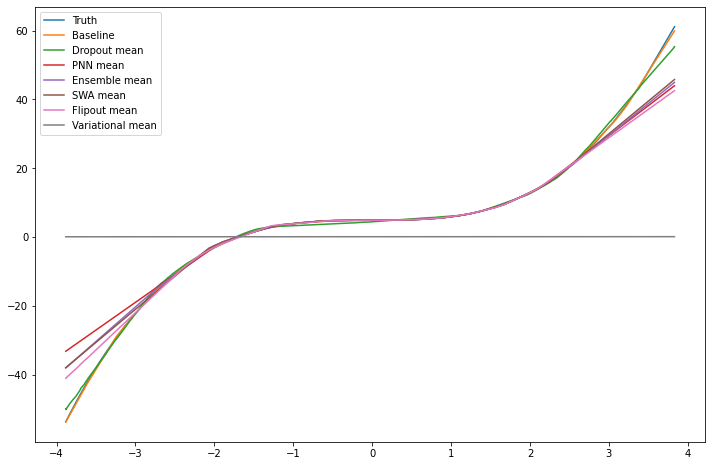

In [14]:
plt.figure(figsize=(12,8))
plt.plot(data_tuple[2][arr1inds,0],data_tuple[2][arr1inds,1],label='Truth')
plt.plot(data_tuple[2][arr1inds,0],baseline[arr1inds,0],label='Baseline')
plt.plot(data_tuple[2][arr1inds,0],dropout_mean[arr1inds,0],label='Dropout mean')
plt.plot(data_tuple[2][arr1inds,0],pnn_mean[arr1inds,0],label='PNN mean')
plt.plot(data_tuple[2][arr1inds,0],ensemble_mean[arr1inds,0],label='Ensemble mean')
plt.plot(data_tuple[2][arr1inds,0],wa_mean[arr1inds,0],label='SWA mean')
plt.plot(data_tuple[2][arr1inds,0],flipout_mean[arr1inds,0],label='Flipout mean')
plt.plot(data_tuple[2][arr1inds,0],variational_mean[arr1inds,0],label='Variational mean')
plt.legend()
plt.ylim()
plt.show()

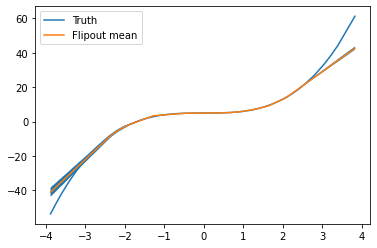

In [15]:
plt.figure()
plt.plot(data_tuple[2][arr1inds,0],data_tuple[2][arr1inds,1],label='Truth')
plt.plot(data_tuple[2][arr1inds,0],flipout_mean[arr1inds,0],label='Flipout mean')
plt.fill_between(x=data_tuple[2][arr1inds,0],y1=flipout_mean[arr1inds,0]-3*flipout_std[arr1inds,0],y2=flipout_mean[arr1inds,0]+3*flipout_std[arr1inds,0])
# plt.ylim(-100,100)
plt.legend()
plt.ylim()
plt.show()

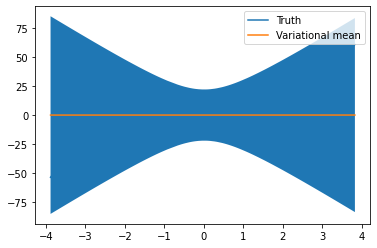

In [16]:
plt.figure()
plt.plot(data_tuple[2][arr1inds,0],data_tuple[2][arr1inds,1],label='Truth')
plt.plot(data_tuple[2][arr1inds,0],variational_mean[arr1inds,0],label='Variational mean')
plt.fill_between(x=data_tuple[2][arr1inds,0],y1=variational_mean[arr1inds,0]-3*variational_std[arr1inds,0],y2=variational_mean[arr1inds,0]+3*variational_std[arr1inds,0])
# plt.ylim(-100,100)
plt.legend()
plt.ylim()
plt.show()

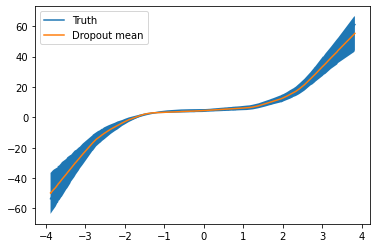

In [17]:
plt.figure()
plt.plot(data_tuple[2][arr1inds,0],data_tuple[2][arr1inds,1],label='Truth')
plt.plot(data_tuple[2][arr1inds,0],dropout_mean[arr1inds,0],label='Dropout mean')
plt.fill_between(x=data_tuple[2][arr1inds,0],y1=dropout_mean[arr1inds,0]-3*dropout_std[arr1inds,0],y2=dropout_mean[arr1inds,0]+3*dropout_std[arr1inds,0])
plt.legend()
plt.ylim()
plt.show()

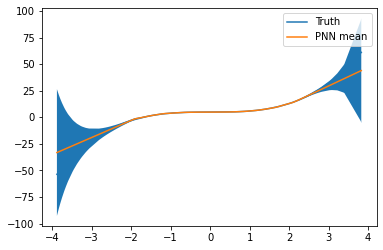

In [18]:
plt.figure()
plt.plot(data_tuple[2][arr1inds,0],data_tuple[2][arr1inds,1],label='Truth')
plt.plot(data_tuple[2][arr1inds,0],pnn_mean[arr1inds,0],label='PNN mean')
plt.fill_between(x=data_tuple[2][arr1inds,0],y1=pnn_mean[arr1inds,0]-3*pnn_std[arr1inds,0],y2=pnn_mean[arr1inds,0]+3*pnn_std[arr1inds,0])
plt.legend()
plt.ylim()
plt.show()

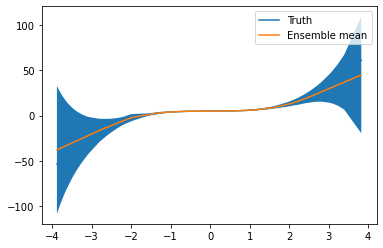

In [19]:
plt.figure()
plt.plot(data_tuple[2][arr1inds,0],data_tuple[2][arr1inds,1],label='Truth')
plt.plot(data_tuple[2][arr1inds,0],ensemble_mean[arr1inds,0],label='Ensemble mean')
plt.fill_between(x=data_tuple[2][arr1inds,0],y1=ensemble_mean[arr1inds,0]-3*ensemble_std[arr1inds,0],y2=ensemble_mean[arr1inds,0]+3*ensemble_std[arr1inds,0])
plt.legend()
plt.ylim()
plt.show()

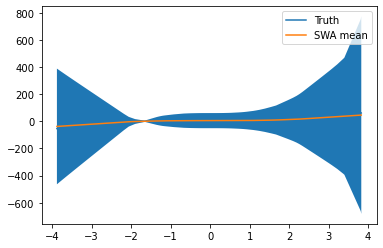

In [20]:
plt.figure()
plt.plot(data_tuple[2][arr1inds,0],data_tuple[2][arr1inds,1],label='Truth')
plt.plot(data_tuple[2][arr1inds,0],wa_mean[arr1inds,0],label='SWA mean')
plt.fill_between(x=data_tuple[2][arr1inds,0],y1=wa_mean[arr1inds,0]-3*wa_std[arr1inds,0],y2=wa_mean[arr1inds,0]+3*wa_std[arr1inds,0])
plt.legend()
plt.ylim()
plt.show()